# Future Mobility Challenge
## Deep Learning and Computer Vision for Autonomous Vehicles (Avs)

# CODE TO CLASSIFY TRAFFIC SIGNS


| ID  | Sign Description              | ID  | Sign Description               |
|-----|-------------------------------|-----|--------------------------------|
|  0  | Speed limit (20km/h)          | 22  | Bumpy road                     |
|  1  | Speed limit (30km/h)          | 23  | Slippery road                  |
|  2  | Speed limit (50km/h)          | 24  | Road narrows on the right   |
|  3  | Speed limit (60km/h)          | 25  | Road work  |
|  4  | Speed limit (70km/h)          | 26  | Traffic signals        |
|  5  | Speed limit (80km/h)          | 27  | Pedestrians   |
|  6  | End of speed limit (80km/h)   | 28  | Children crossing        |
|  7  | Speed limit (100km/h)         | 29  | Bicycles crossing     |
|  8  | Speed limit (120km/h)         | 30  | Beware of ice/snow    |
|  9  | No passing                    | 31  |  Wild animals crossing    |
| 10  | No passing for vehicles over 3.5t | 32  | End of all speed and passing limits|
| 11  | Right of way at next intersection | 33  | Turn right ahead |
| 12  | Priority road                 | 34  | Turn left ahead     |
| 13  | Yield                         | 35  | Ahead only       |
| 14  | Stop                          | 36  | Go straight or right      |
| 15  | No vehicles                   | 37  | Go straight or left   |
| 16  | Vehicles over 3.5t prohibited | 38  | Keep right     |
| 17  | No entry                      | 39  | Keep left           |
| 18  | General caution               | 40  | Roundabout mandatory         |
| 19  | Dangerous curve to the left   | 41  | End of no passing   |
| 20  | Dangerous curve to the right  | 42  |  End of no passing by vehicles over 3.5 metric tons             |




## 1. Research AlexNet Convolutional Neural Network, draw the network architecture, and indicate the use of each of the layers such as convolution/feature extraction, max pooling, and flattening layers.

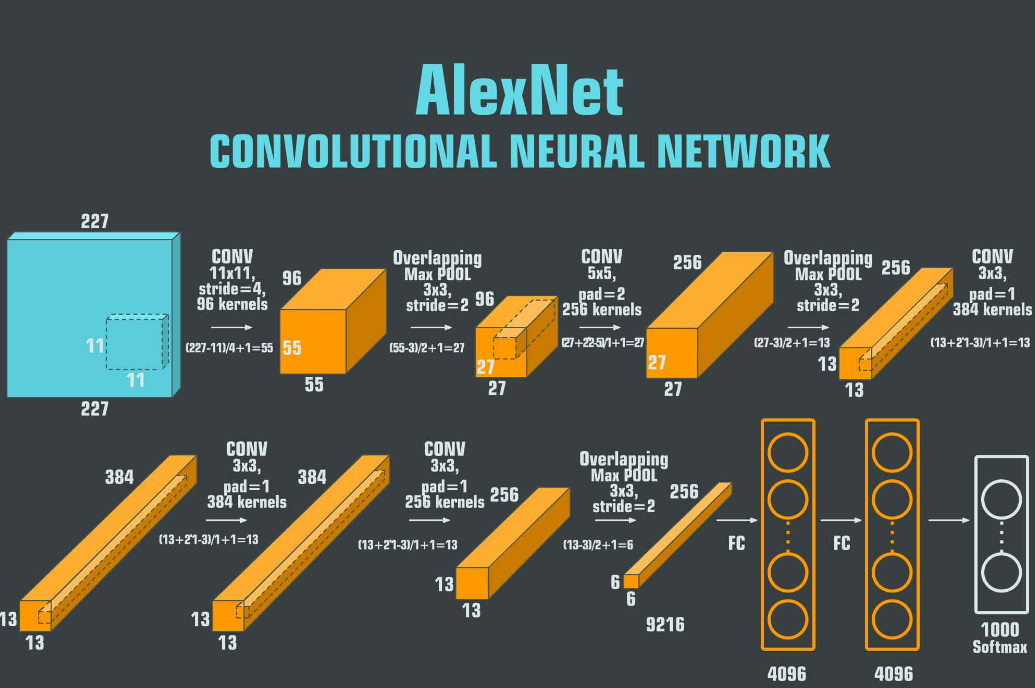

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import libraries
import pickle
import tensorflow as tf
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [ ]:
# Setting the work environmnet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the training, validation and testing data

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Traffic signs/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/MyDrive/Colab Notebooks/Traffic signs/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/Colab Notebooks/Traffic signs/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
# Extracting from each dataset the feature information and the information with the labels.
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
# Checking the shape of the training dataset
X_train.shape

(34799, 32, 32, 3)

In [ ]:
# Checking the shape of the training data with the labels
y_train.shape

(34799,)

## 2. Visualize a sample image from each class in the dataset. Display the corresponding label and perform a sanity check.

In [ ]:
labels_dict = {0 : 'Speed limit (20km/h)', 1 : 'Speed limit (30km/h)', 2 : 'Speed limit (50km/h)', 3 : 'Speed limit (60km/h)', 4 : 'Speed limit (70km/h)', 5 : 'Speed limit (80km/h)', 6 : 'End of speed limit (80km/h)',
               7 : 'Speed limit (100km/h)', 8 : 'Speed limit (120km/h)', 9 : 'No passing', 10 : 'No passing for vehicles over 3.5 metric tons', 11 : 'Right-of-way at the next intersection', 12 : 'Priority road',
               13 : 'Yield', 14 : 'Stop', 15 : 'No vehicles', 16 : 'Vehicles over 3.5 metric tons prohibited', 17 : 'No entry', 18 : 'General caution', 19 : 'Dangerous curve to the left', 20 : 'Dangerous curve to the right',
               21 : 'Double curve', 22 : 'Bumpy road', 23 : 'Slippery road', 24 : 'Road narrows on the right', 25 : 'Road work', 26 : 'Traffic signals', 27 : 'Pedestrians', 28 : 'Children crossing', 29 : 'Bicycles crossing', 30 : 'Beware of ice/snow',
               31 : 'Wild animals crossing', 32 : 'End of all speed and passing limits', 33 : 'Turn right ahead', 34 : 'Turn left ahead', 35 : 'Ahead only', 36 : 'Go straight or right', 37 : 'Go straight or left', 38 : 'Keep right',
               39 : 'Keep left', 40 : 'Roundabout mandatory', 41 : 'End of no passing', 42 : 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
# Creating a dictionary with the number of images per class
class_number, counts = np.unique(y_train, return_counts=True)
count_dict = {}
for value, count in zip(class_number, counts):
  count_dict.update({value : count})

In [ ]:
import plotly.express as px

# Convert the dictionary to a Pandas DataFrame
counts_df = pd.DataFrame(count_dict.items(), columns=['Class', 'Counts'])

# Sort the DataFrame by Counts in descending order
counts_df = counts_df.sort_values(by='Counts', ascending=False)

# Create an interactive bar chart using Plotly
fig = px.bar(counts_df, x='Counts', y='Class', orientation='h', title='Number of images by class')
fig.show()

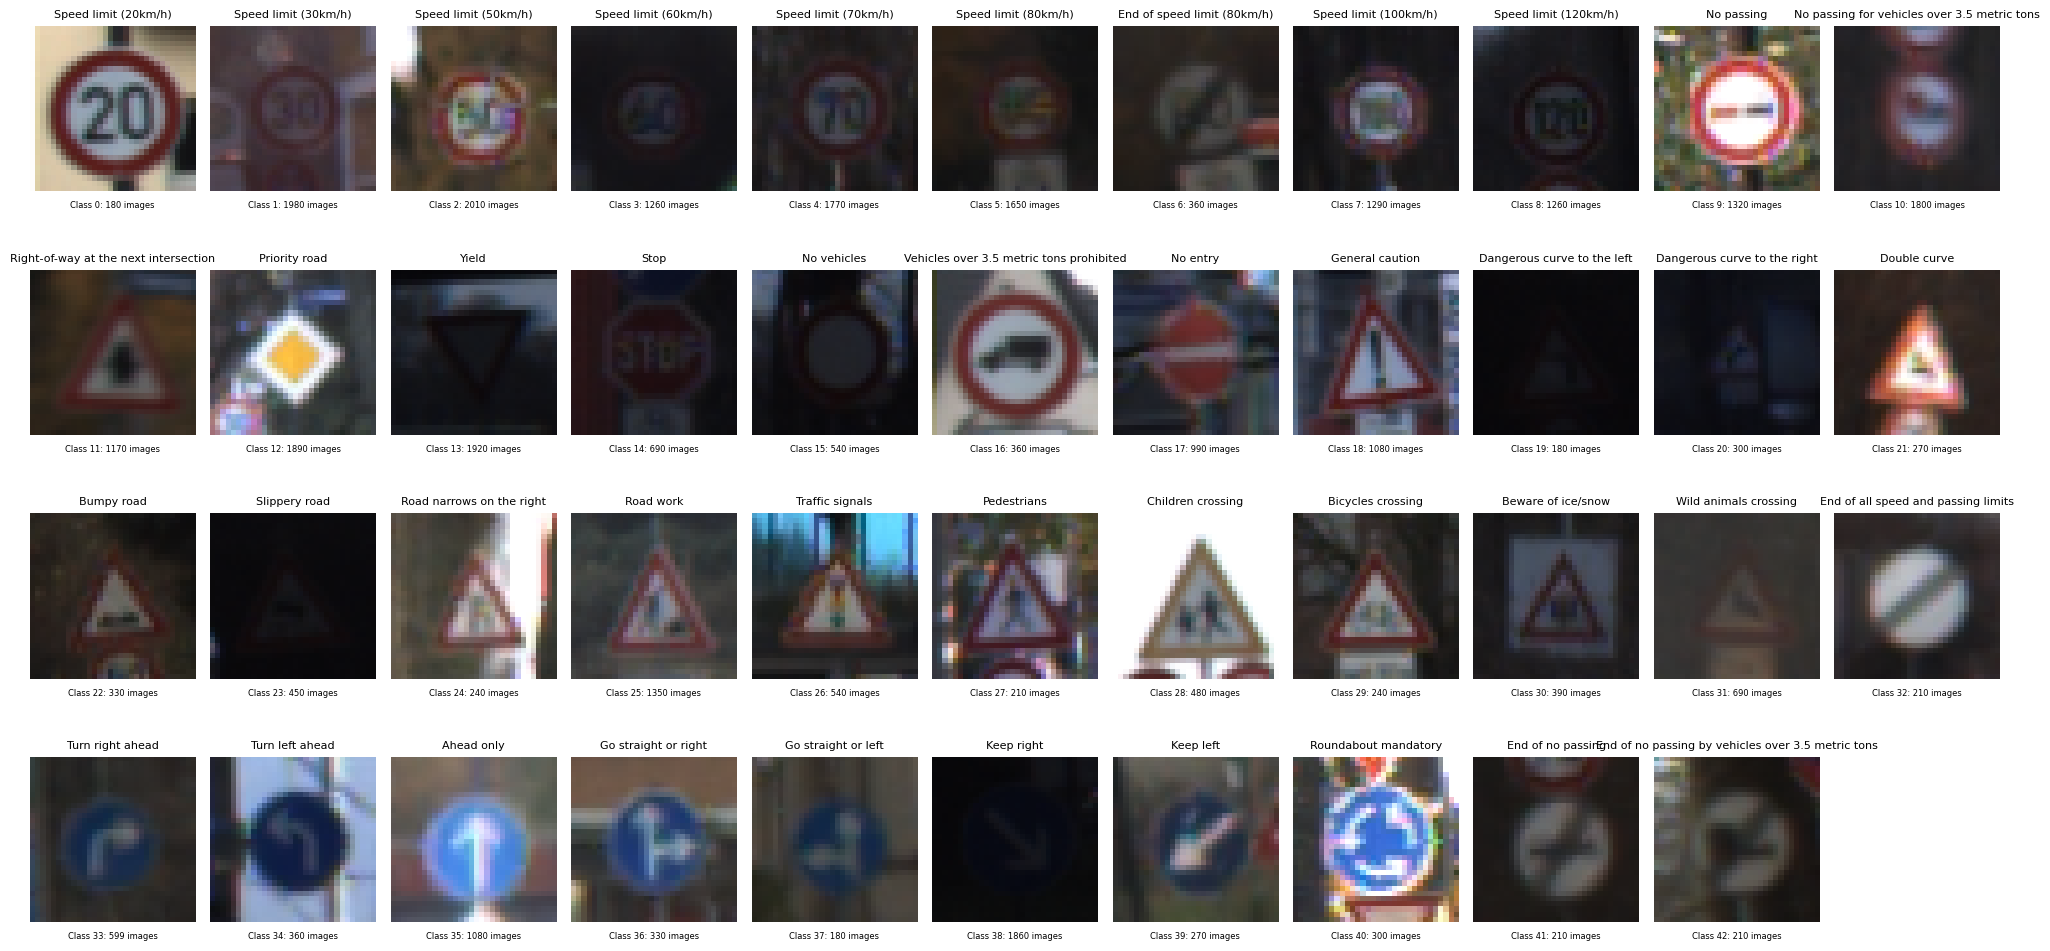

In [ ]:
# Shape of the chart matrix
rows = 4
columns = 11

plt.figure(figsize=(20, 10))  # Adjust the figure size as needed

for i in range(43):
    index = np.nonzero(y_train == i)[0][0]
    image = X_train[index]

    plt.subplot(rows, columns, i + 1)
    plt.title(labels_dict[y_train[index]], fontsize=8)
    plt.imshow(image, cmap='gray')  # You might need to specify the colormap
    plt.axis('off')

    # Adding class number as a subtitle
    subtitle = "Class {}: {} images".format(y_train[index], count_dict[i])
    plt.text(0.5, -0.1, subtitle, fontsize=6, ha='center', transform=plt.gca().transAxes)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


As we can see from the previous chart this dataset is highly imbalanced so it will be really necessary to analyze the performance metrics beyond accuracy.

# DATA PEPARATION

In [ ]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# Converting the images form RBG colors to gray color
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [ ]:
# Normalizing the values
X_train_gray_norm = X_train_gray/255.0
X_test_gray_norm = X_test_gray/255.0
X_validation_gray_norm = X_validation_gray/255.0

In [ ]:
# Shape of the training dataset
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_train.shape

(34799, 32, 32, 3)

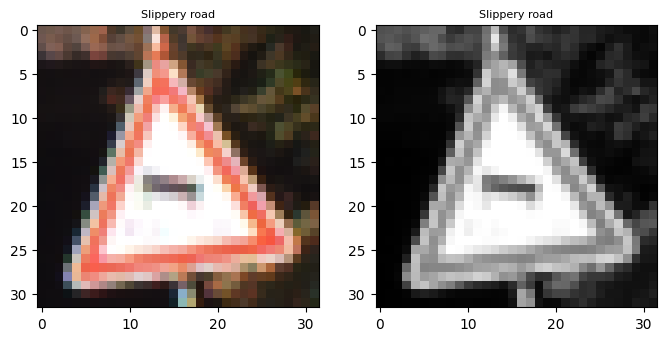

In [ ]:
# Visualizig one signal in the original training data and the gray sclaed one + the label
i = 610
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
plt.title(labels_dict[y_train[i]], fontsize=8)
plt.imshow(X_train[i])
plt.subplot(1,2,2)
plt.title(labels_dict[y_train[i]], fontsize=8)
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

In [ ]:
# Normalizing the data and reshaping keeping the RBG colors
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0
X_validation_norm = X_validation/255.0

## MODEL TRAINING

In [ ]:
# Import train_test_split from scikit library
# Import Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# from subprocess import check_output
from sklearn.model_selection import train_test_split


In [ ]:
image_shape = X_train_gray_norm[i].shape
print(image_shape)

(32, 32, 1)


In [ ]:
image_shape = X_train[i].shape
print(image_shape)

(32, 32, 3)


### Baseline model

In [ ]:
# Creating a baseline model
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu', padding = 'same'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(43, activation = 'sigmoid'))


In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy',
                  optimizer=Adam(lr=0.001),
                  metrics =['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25632     
                                                                 
 dense_3 (Dense)             (None, 43)                1419      
                                                                 
Total params: 27,947
Trainable params: 27,947
Non-trainable params: 0
__________________________________________________

In [ ]:
import time

start_time = time.time()

history = cnn_model.fit(X_train_norm,
                        y_train,
                        batch_size=500,
                        epochs=20,
                        verbose=1,
                        validation_data = (X_validation_norm,y_validation))

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/20
70/70 [==============================] - 3s 13ms/step - loss: 3.4496 - accuracy: 0.1374 - val_loss: 3.2797 - val_accuracy: 0.2095
Epoch 2/20
70/70 [==============================] - 1s 9ms/step - loss: 2.7393 - accuracy: 0.3178 - val_loss: 2.5641 - val_accuracy: 0.3261
Epoch 3/20
70/70 [==============================] - 1s 9ms/step - loss: 2.1007 - accuracy: 0.3999 - val_loss: 2.1751 - val_accuracy: 0.3542
Epoch 4/20
70/70 [==============================] - 1s 9ms/step - loss: 1.7585 - accuracy: 0.4731 - val_loss: 1.9279 - val_accuracy: 0.4268
Epoch 5/20
70/70 [==============================] - 1s 9ms/step - loss: 1.5443 - accuracy: 0.5349 - val_loss: 1.7940 - val_accuracy: 0.4585
Epoch 6/20
70/70 [==============================] - 1s 8ms/step - loss: 1.3751 - accuracy: 0.5902 - val_loss: 1.6952 - val_accuracy: 0.4905
Epoch 7/20
70/70 [==============================] - 1s 9ms/step - loss: 1.2434 - accuracy: 0.6337 - val_loss: 1.5770 - val_accuracy: 0.5367
Epoch 8/20
70/70 [=

In [ ]:
# Evaluating the performance in the testing dataset
score = cnn_model.evaluate(X_test_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.7134


**Baseline Models**  
- Images Gray scale - 69% testing accuracy  
- Images RBG without scaling 51% testing accuracy  
- Images RBG scaling 71% testing accuracy  

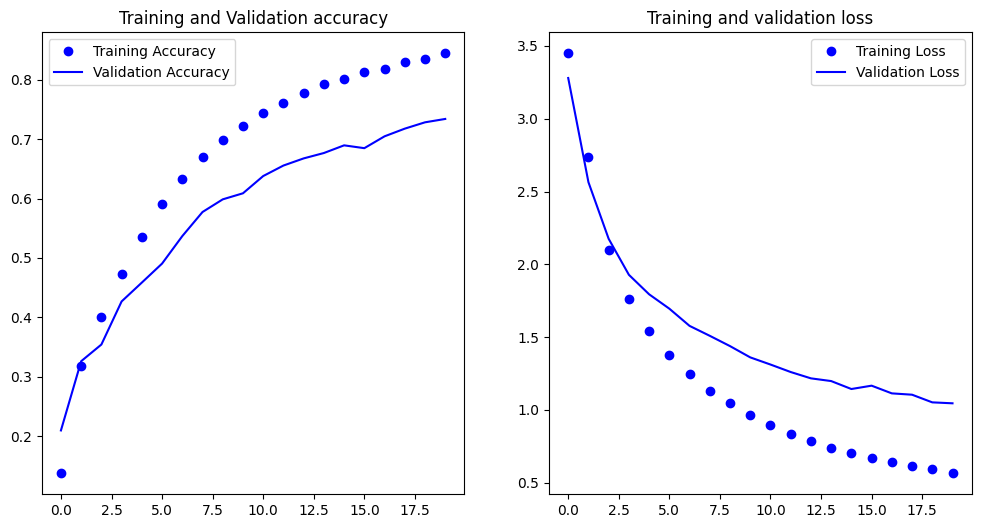

In [ ]:
# Plotting the result of accuracy in the training and validation datasets
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# get the predictions for the test data
predict_x = cnn_model.predict(X_test_norm)
predicted_classes = np.argmax(predict_x, axis=1)

# get the indices to be plotted
y_true = y_test


395/395 [==============================] - 1s 2ms/step


In [ ]:
# Creating a confusion matrix to explore the errors and good predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
cm

array([[ 23,   9,  24, ...,   1,   0,   0],
       [145, 394, 104, ...,   0,   0,   0],
       [122,  69, 422, ...,   2,   0,   0],
       ...,
       [  0,   0,   0, ...,  77,   0,   0],
       [  0,   0,   0, ...,   0,  35,   0],
       [  0,   0,   0, ...,   1,  10,  58]])

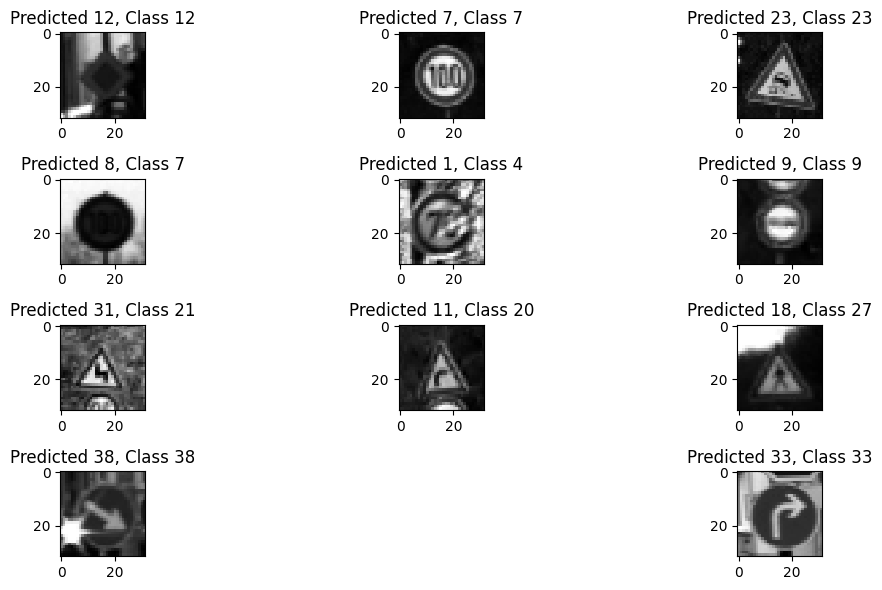

In [ ]:
# Ploting the first "n" images with predicted and real label

plt.figure(figsize=(12, 6))
for i in range(0,12):

    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()

## 3. Train a CNN based on AlexNet to classify traffic signs. Train the model using 15 epochs and plot the network accuracy vs. the number of epochs.  

### AlexNet Model

In [ ]:
# Creating the AlexNet Arquitecture
alexnet = Sequential()

alexnet.add(Conv2D(96, (11,11), strides=4, activation='relu', input_shape=image_shape))
alexnet.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))

alexnet.add(Conv2D(256, (5,5), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))

alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
alexnet.add(Conv2D(256, (3,3), padding='same', activation='relu'))
alexnet.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))

alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))

alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(43, activation='softmax'))

In [ ]:
alexnet.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 6, 6, 96)          11712     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 3, 3, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 3, 3, 256)         614656    
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 2, 2, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 2, 2, 384)         885120    
                                                                 
 conv2d_58 (Conv2D)          (None, 2, 2, 384)       

In [ ]:
# Compiler setting
alexnet.compile(loss ='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics =['accuracy'])

In [ ]:
# Training the model
start_time = time.time()

history1 = alexnet.fit(X_train_gray_norm, y_train,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_data=(X_validation_gray_norm, y_validation),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/15
272/272 [==============================] - 421s 2s/step - loss: 2.8850 - accuracy: 0.1498 - val_loss: 2.5153 - val_accuracy: 0.2637
Epoch 2/15
272/272 [==============================] - 417s 2s/step - loss: 1.8909 - accuracy: 0.3881 - val_loss: 1.8142 - val_accuracy: 0.4349
Epoch 3/15
272/272 [==============================] - 426s 2s/step - loss: 1.2688 - accuracy: 0.5739 - val_loss: 1.3690 - val_accuracy: 0.5841
Epoch 4/15
272/272 [==============================] - 420s 2s/step - loss: 0.9067 - accuracy: 0.6955 - val_loss: 1.2049 - val_accuracy: 0.6417
Epoch 5/15
272/272 [==============================] - 439s 2s/step - loss: 0.6593 - accuracy: 0.7814 - val_loss: 1.2068 - val_accuracy: 0.6889
Epoch 6/15
272/272 [==============================] - 424s 2s/step - loss: 0.5350 - accuracy: 0.8225 - val_loss: 1.0847 - val_accuracy: 0.7057
Epoch 7/15
272/272 [==============================] - 426s 2s/step - loss: 0.4563 - accuracy: 0.8512 - val_loss: 1.0121 - val_accuracy: 0.7385

## 4. Test the trained CNN and evaluate its performance on the testing (holdout) dataset. Note that the testing dataset has never been seen by the model during training.  

In [ ]:
# Evaluating the model using the testing dataset
score = alexnet.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.7842


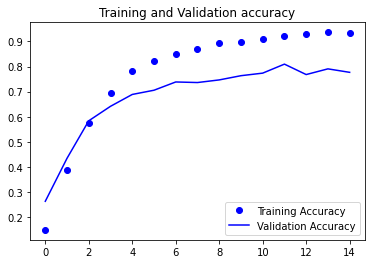

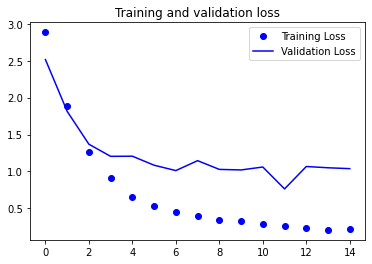

In [ ]:
# Plotting the result of accuracy in the training and validation datasets
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 5. Fine-tune the trained model by training it on additional datasets. Feel free to collect data from the internet or using a mobile device

## 6. Explore 3 different ways to improve the network accuracy such as increasing the number of epochs, adding additional convolutional/max-pooling layers, or adding dropout layers. Retrain the network and display the results. Any reasonable answer should be sufficient.

In [ ]:
alexnet1 = Sequential()

alexnet1.add(Conv2D(64, (11,11), strides=4, activation='relu', input_shape=image_shape))
alexnet1.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))
alexnet1.add(Dropout(0.5))

alexnet1.add(Conv2D(128, (5,5), padding='same', activation='relu'))
alexnet1.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))
alexnet1.add(Dropout(0.5))

alexnet1.add(Conv2D(256, (3,3), padding='same', activation='relu'))
alexnet1.add(Conv2D(256, (3,3), padding='same', activation='relu'))
alexnet1.add(Conv2D(128, (3,3), padding='same', activation='relu'))
alexnet1.add(MaxPooling2D(pool_size=3, strides=2, padding = 'same'))
alexnet1.add(Dropout(0.3))

alexnet1.add(Flatten())
alexnet1.add(Dense(512, activation='relu'))
alexnet1.add(Dropout(0.3))

alexnet1.add(Dense(512, activation='relu'))
alexnet1.add(Dropout(0.3))
alexnet1.add(Dense(43, activation='softmax'))

In [ ]:
alexnet1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 6, 6, 64)          7808      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 3, 3, 64)          0         
                                                                 
 conv2d_71 (Conv2D)          (None, 3, 3, 128)         204928    
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 2, 2, 128)        0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 2, 2, 128)       

In [ ]:
alexnet1.compile(loss ='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics =['accuracy'])

In [ ]:
start_time = time.time()

history2 = alexnet1.fit(X_train_gray_norm, y_train,
          batch_size=256,
          epochs=15,
          verbose=1,
          validation_data=(X_validation_gray_norm, y_validation),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/15
136/136 [==============================] - 108s 787ms/step - loss: 3.3109 - accuracy: 0.0924 - val_loss: 3.0756 - val_accuracy: 0.1531
Epoch 2/15
136/136 [==============================] - 105s 772ms/step - loss: 2.6794 - accuracy: 0.2090 - val_loss: 2.2816 - val_accuracy: 0.3054
Epoch 3/15
136/136 [==============================] - 105s 772ms/step - loss: 2.2242 - accuracy: 0.3227 - val_loss: 1.9719 - val_accuracy: 0.3864
Epoch 4/15
136/136 [==============================] - 106s 776ms/step - loss: 1.9380 - accuracy: 0.4016 - val_loss: 1.6701 - val_accuracy: 0.4549
Epoch 5/15
136/136 [==============================] - 105s 769ms/step - loss: 1.7580 - accuracy: 0.4580 - val_loss: 1.4995 - val_accuracy: 0.5204
Epoch 6/15
136/136 [==============================] - 106s 781ms/step - loss: 1.6077 - accuracy: 0.5022 - val_loss: 1.4804 - val_accuracy: 0.5331
Epoch 7/15
136/136 [==============================] - 104s 768ms/step - loss: 1.4582 - accuracy: 0.5502 - val_loss: 1.2820 -

## 7. Build 3 different deep convolutional neural networks with various architectures. Feel free to choose the number of layers, number of kernels (feature detectors), number of dense (Fully-connected) layers, number of neurons in the dense layer, activation functions, regularization such as dropout, etc. Retrain the network and plot the results.

### GoogLeNet

### ResNet

### Other architectural structure

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
# Explore the structure of the NN
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [ ]:
# Compile metrics

model.compile(loss ='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics =['accuracy'])

In [ ]:
start_time = time.time()

history1 = model.fit(X_train_gray_norm, y_train,
          batch_size=500,
          epochs=15,
          verbose=1,
          validation_data=(X_validation_gray_norm, y_validation),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/15
70/70 [==============================] - 5s 49ms/step - loss: 3.4438 - accuracy: 0.0798 - val_loss: 3.3690 - val_accuracy: 0.1154
Epoch 2/15
70/70 [==============================] - 3s 36ms/step - loss: 2.1493 - accuracy: 0.3895 - val_loss: 1.1348 - val_accuracy: 0.6753
Epoch 3/15
70/70 [==============================] - 3s 37ms/step - loss: 0.8478 - accuracy: 0.7317 - val_loss: 0.3990 - val_accuracy: 0.8707
Epoch 4/15
70/70 [==============================] - 3s 36ms/step - loss: 0.4035 - accuracy: 0.8744 - val_loss: 0.2164 - val_accuracy: 0.9304
Epoch 5/15
70/70 [==============================] - 3s 36ms/step - loss: 0.2488 - accuracy: 0.9225 - val_loss: 0.1597 - val_accuracy: 0.9463
Epoch 6/15
70/70 [==============================] - 3s 36ms/step - loss: 0.1708 - accuracy: 0.9464 - val_loss: 0.1608 - val_accuracy: 0.9546
Epoch 7/15
70/70 [==============================] - 3s 36ms/step - loss: 0.1333 - accuracy: 0.9574 - val_loss: 0.1238 - val_accuracy: 0.9642
Epoch 8/15
70

In [ ]:
score = model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9603


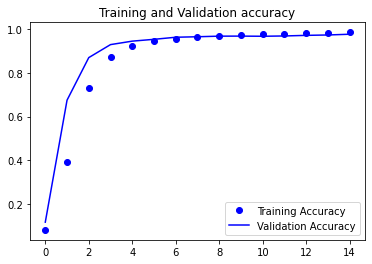

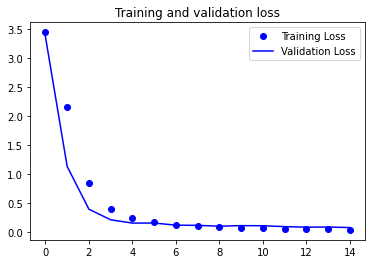

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# New way:
predict_x = model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)

#get the indices to be plotted
y_true = y_test

395/395 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
cm

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 716,   0, ...,   0,   0,   0],
       [  0,   5, 744, ...,   0,   0,   0],
       ...,
       [  0,   1,   1, ...,  80,   0,   0],
       [  0,   0,   0, ...,   0,  48,   0],
       [  0,   0,   0, ...,   0,   0,  89]])

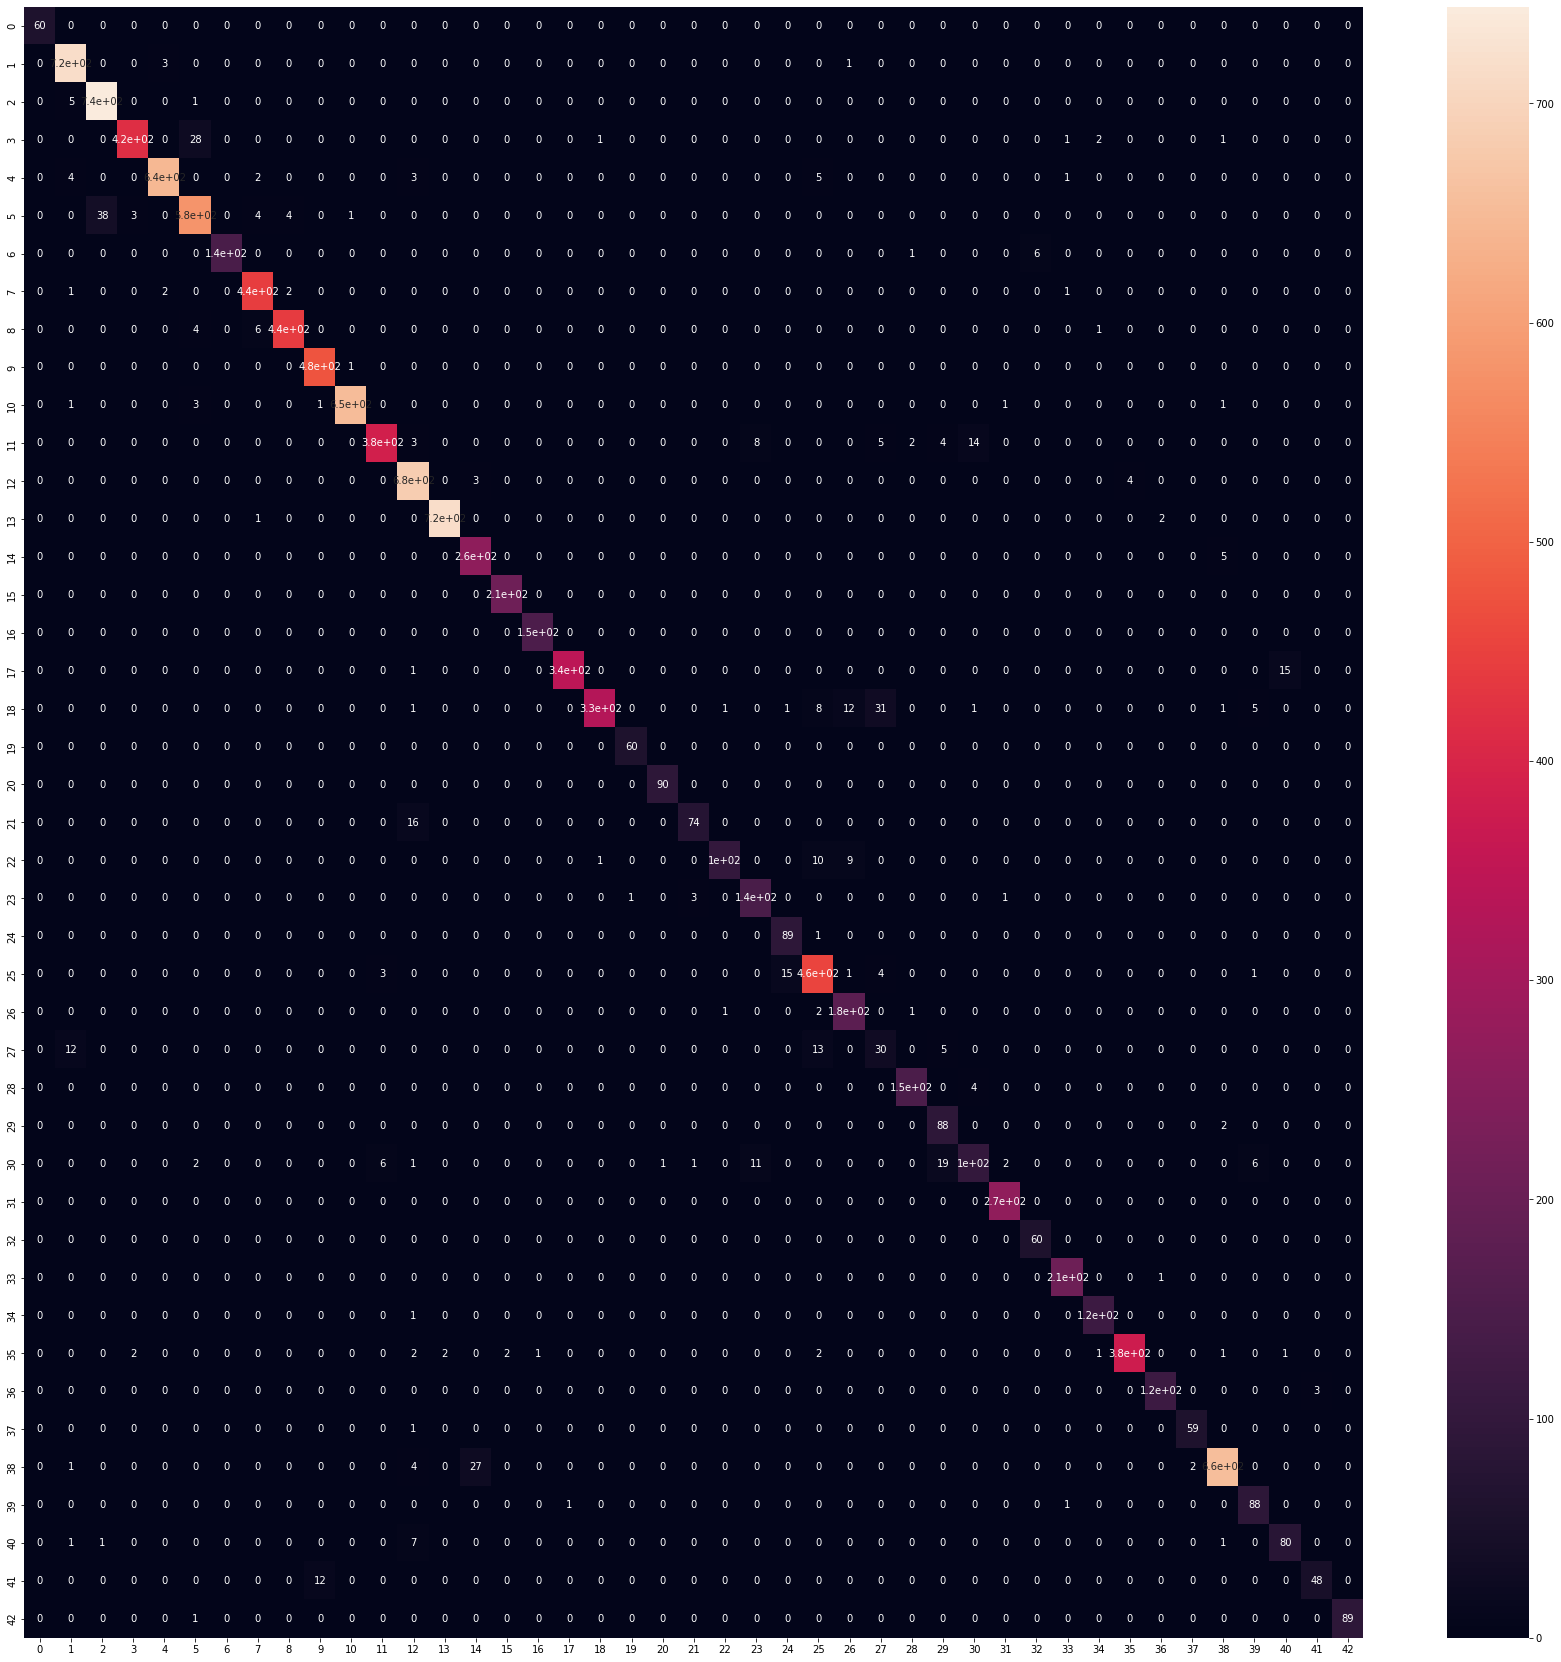

In [ ]:
import seaborn as sn
cm2 = cm.copy()
#cm2[cm2 > 100] = -1
plt.figure(figsize = (30,30))
sn.heatmap(cm2, annot=True)

Create a way to get the number of errors per signal, and those who get the highest error, look for images

In [ ]:
sum_of_rows = np.sum(cm2, axis = 0)
max_of_rows = np.max(cm2, axis = 0)

In [ ]:
# Getting the sum of elements per row
sum_of_rows

array([ 60, 744, 753, 421, 655, 617, 133, 441, 474, 496, 662, 460, 694,
       718, 279, 213, 150, 368, 378,  44,  95,  60, 128, 176,  91, 455,
       194,  63, 165, 107, 119, 276,  73, 206, 127, 378, 123,  61, 662,
        81,  97,  44,  89])

In [ ]:
# Getting the numer of maxmum values = diagonal values
max_of_rows

array([ 60, 712, 740, 420, 643, 588, 133, 425, 447, 476, 655, 399, 677,
       717, 267, 210, 150, 352, 361,  42,  87,  60, 113, 146,  86, 452,
       166,  55, 148,  89, 109, 269,  60, 205, 120, 366, 120,  59, 661,
        79,  85,  42,  87])

In [ ]:
# Number of missclasifyed per signal
sum_of_rows - max_of_rows

array([ 0, 32, 13,  1, 12, 29,  0, 16, 27, 20,  7, 61, 17,  1, 12,  3,  0,
       16, 17,  2,  8,  0, 15, 30,  5,  3, 28,  8, 17, 18, 10,  7, 13,  1,
        7, 12,  3,  2,  1,  2, 12,  2,  2])

## 8. Test the trained deep CNNs on brand-new images. This might involve collecting traffic sign data and evaluating the system's performance and make adjustment as necessary

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from pathlib import Path
p = Path().cwd()
q = p/"/content/drive/MyDrive/Colab Notebooks/Traffic signs/traffic-sig-new-data"  # use p to create a path to the data


target_dict = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
               '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19,
               '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29,
               '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39,
               '40': 40, '41': 41, '42': 42} # create dictionary mapping you data classes/labels to integer labels

images = [] # create an empty list
labels = [] # create an empty list

for fldr in q.iterdir():
    current_label = fldr.name # get the name of the current label
    temp = q/current_label # here we are adding each if the inside folder name to the path so we can go through each of them
    for img in temp.iterdir():
      img = load_img(img, color_mode = "grayscale") # load image as grayscale
      img_array = img_to_array(img) # convert the image to an NumPy array
      img_array_resized = smart_resize(img_array, size = (32,32)) # if necessary, resize the image to 128 by 128
      img_array_reshaped = img_array_resized[:,:,0] # reshape the image from (height, width, 1) to (height, width)
      images.append(img_array_reshaped) # add reshaped image to list of images
      labels.append(fldr.name) # add label for this image to the list of labels

In [ ]:
images1 = np.array(images) # convert the list of images to a NumPy array
labels1 = np.array(labels) # convert the list of labels to a NumPy array
images1.shape

(301, 32, 32)

'10'

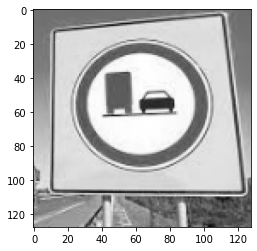

In [ ]:
# use plt.imshow() to view a few of the grayscale images
i = 70
plt.imshow(images1[i], cmap='gray')
labels1[i]

In [ ]:
new_X_test = images1
new_y_test = [target_dict.get(e, e) for e in labels1] # use the target_dict to convert the string labels to an array of integers

In [ ]:
# New way:
new_predict = model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)

#get the indices to be plotted
y_true = y_test